More on plotting
====

Figure arrays
-----
Sometimes we want several plots in one figure. We can achieve this with the `par()` function.

In [ ]:
options(repr.plot.width=6, repr.plot.height=4)

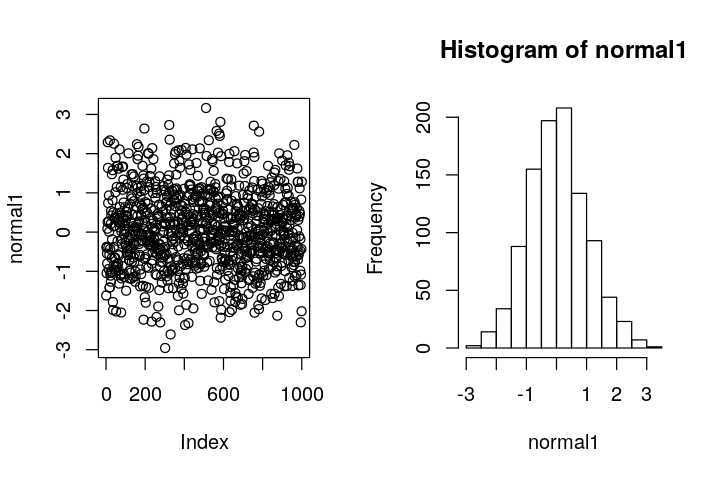

In [2]:
normal1 <- rnorm(1000)
par(mfrow=c(1,2))
plot(normal1)
hist(normal1)

Here `mfrow=c(1,2)` specifies that the plots should be arranged as one row and two columns, and placement of figures should go by rows.

Alternatively, `mfcol` argument would force placement by columns. In this particular example, it gives an identical result.

Now generate normally-distributed random numbers with twice the variance and compare the plots.

In [3]:
options(repr.plot.width=8,repr.plot.height=8)

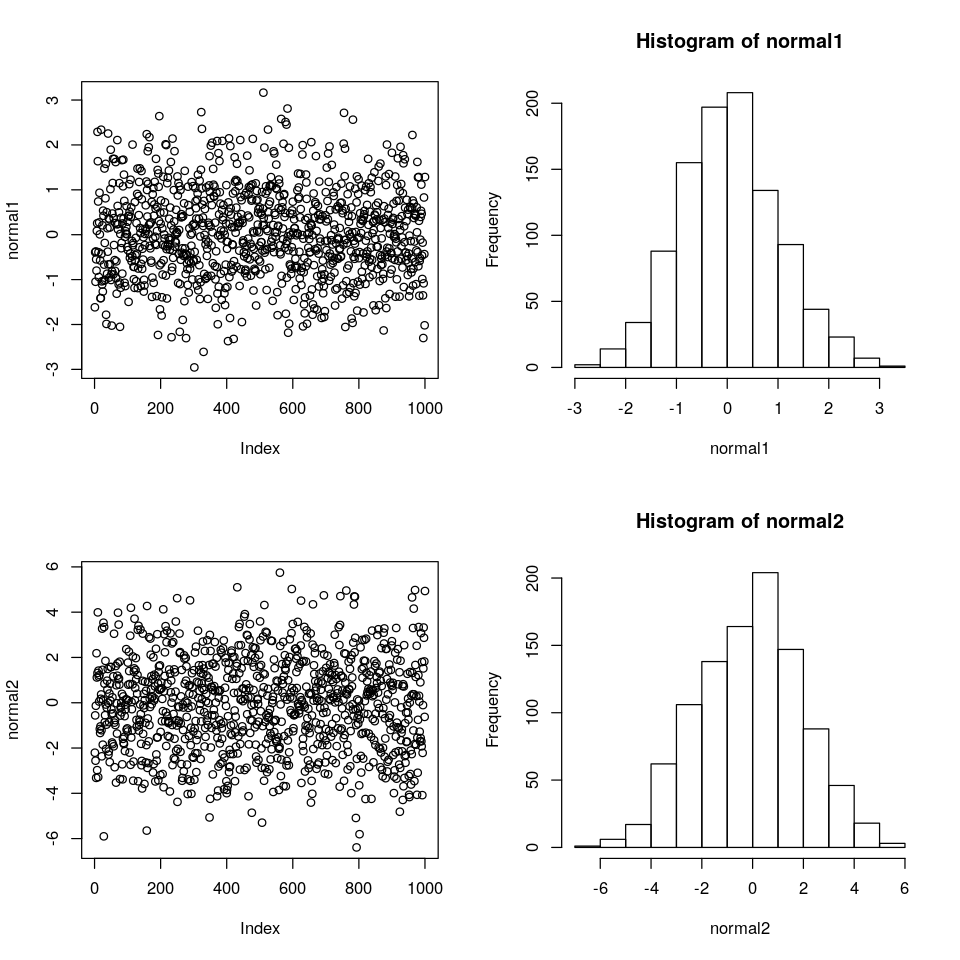

In [4]:
normal2 <- rnorm(1000, sd = 2)
par(mfrow=c(2,2))
plot(normal1)
hist(normal1)
plot(normal2)
hist(normal2)

Match the axis scales for better comparison.

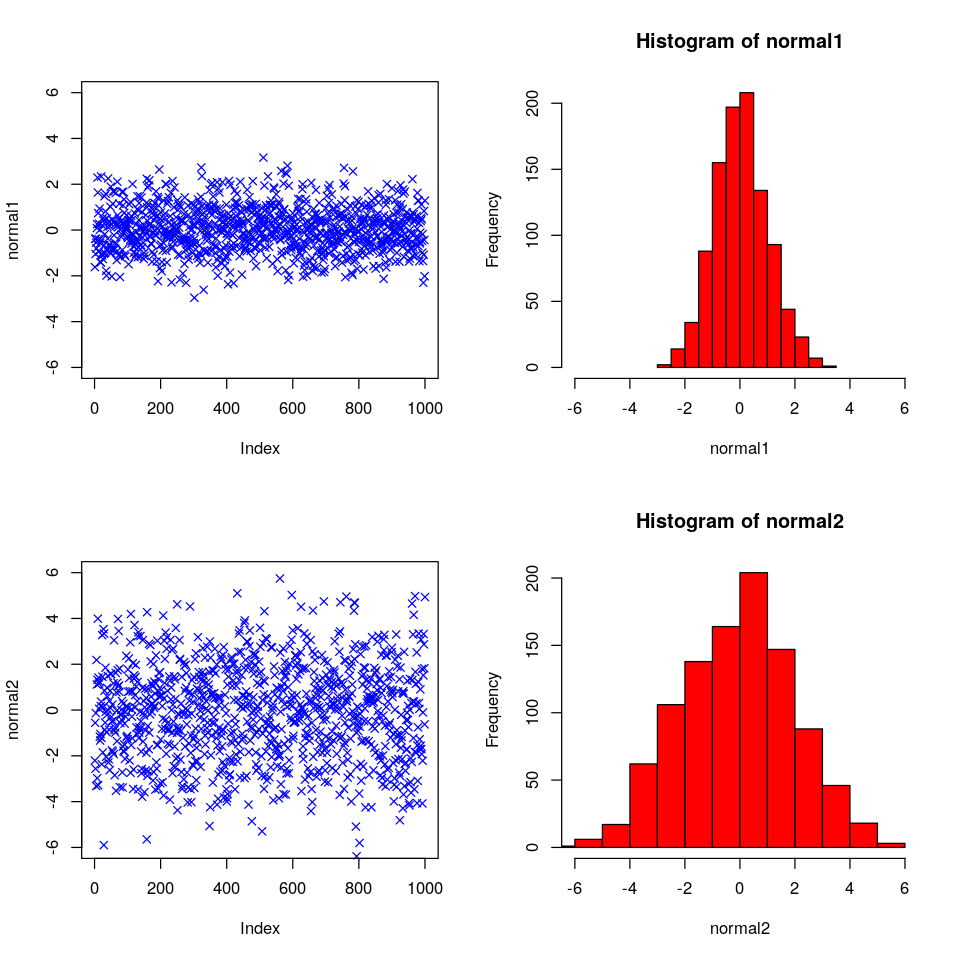

In [5]:
par(mfrow=c(2,2))
plot(normal1, ylim = c(-6,6),pch=4, col="blue")
hist(normal1, xlim = c(-6,6), col="red")
plot(normal2, ylim = c(-6,6),pch=4, col="blue")
hist(normal2, xlim = c(-6,6), col="red")

Let's do some parametric plots of Lissajous figures. These are defined as $x=\cos(at)$ and $y=\sin(bt)$, where $t$ is between 0 and $2\pi$, and $a$ and $b$ are integers.

In [6]:
options(repr.plot.width=8,repr.plot.height=6)

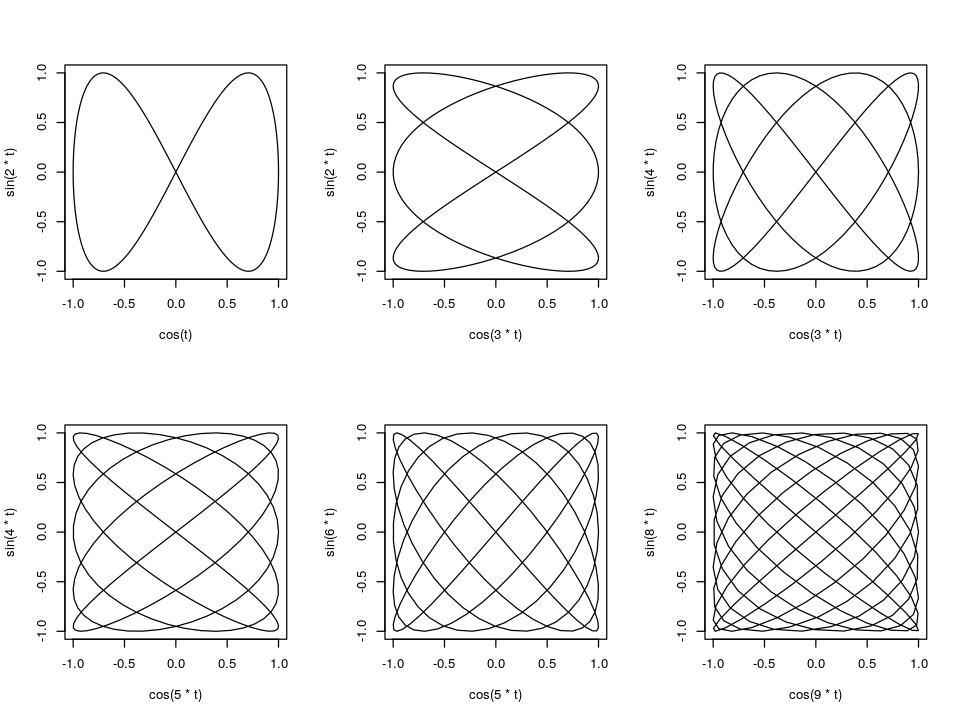

In [7]:
t <- seq(0,2*pi,length.out = 200)
par(mfrow=c(2,3))
plot(cos(t), sin(2*t), type="l")
plot(cos(3*t), sin(2*t), type="l")
plot(cos(3*t), sin(4*t), type="l")
plot(cos(5*t), sin(4*t), type="l")
plot(cos(5*t), sin(6*t), type="l")
plot(cos(9*t), sin(8*t), type="l")

Box plots
----
A _box-and-whisker_ plot provides a graphical summary of the distribution of data points.

Let's generate some random numbers and create box plots with them.

In [8]:
randnums <- rnorm(1000)

We can get some summary statistics about the data vector using the `summary()` function.

In [9]:
summary(randnums)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-3.228305 -0.635999 -0.003964  0.032075  0.676737  3.661734 

In [10]:
options(repr.plot.width=6,repr.plot.height=3)

The boxplot is a visual summary of the data:

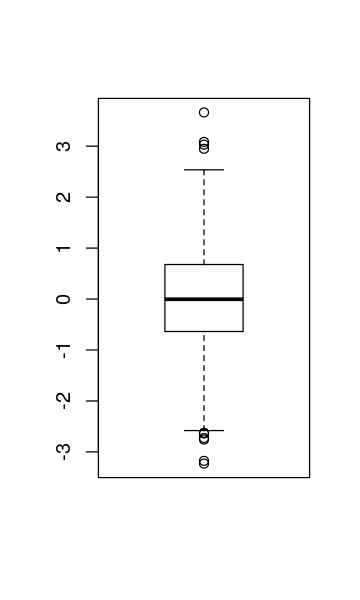

In [11]:
options(repr.plot.width=3,repr.plot.height=5)
boxplot(randnums)

Sometimes it might be better to plot it sideways:

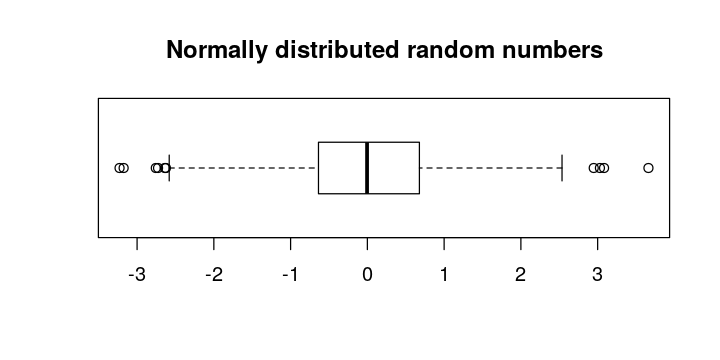

In [12]:
options(repr.plot.width=6,repr.plot.height=3)
boxplot(randnums,horizontal = TRUE)
title("Normally distributed random numbers")

* The lines in the box indicate the first quartile, the median, and the third quartile. The length of the box is the *interquartile range*. 
* The lines (*whiskers*) extend to the observations that are within a distance of 1.5 times the box length.
* Any other points farther out are considered outliers, and shown separately.

Boxplots of two or more distributions can be displayed side-by-side using `par()` function, but it is more informative to show them on a common set of axes.

In [13]:
randnums2 <- rnorm(1000, sd=2)

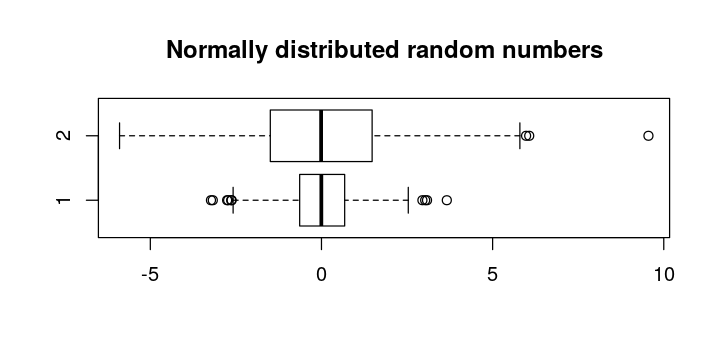

In [14]:
options(repr.plot.width=6,repr.plot.height=3)
boxplot(randnums, randnums2, horizontal = TRUE)
title("Normally distributed random numbers")

Let's draw boxplots on the *mtcars* data set.

In [15]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


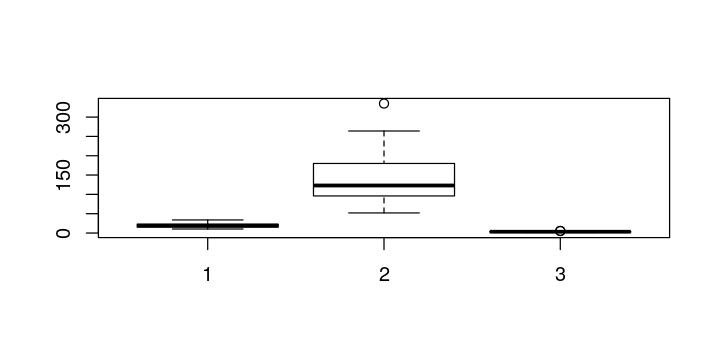

In [16]:
boxplot(mtcars$mpg, mtcars$hp, mtcars$wt)

The scales vary too much. It is better in this case to plot them on separate axes.

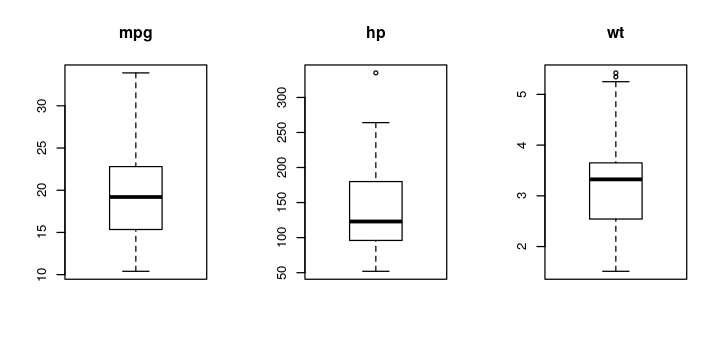

In [17]:
par(mfrow = c(1,3))
boxplot(mtcars$mpg)
title("mpg")
boxplot(mtcars$hp)
title("hp")
boxplot(mtcars$wt)
title("wt")

Strip charts
----
A strip chart is a one-dimensional scatter plot of some data. It helps us to see distributions of data points.

In [18]:
randnums1 <- rnorm(100)
randnums2 <- rnorm(100,mean=1,sd=0.5)

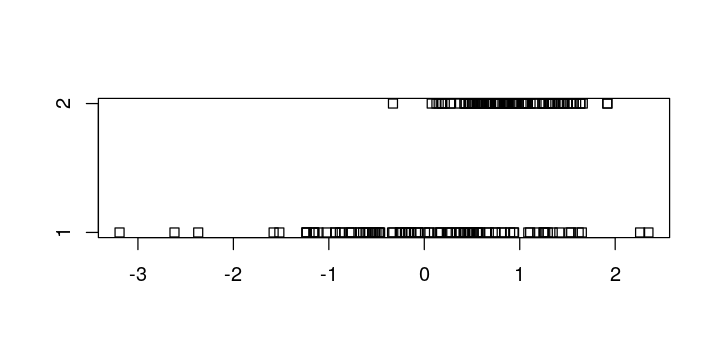

In [19]:
stripchart(list(randnums1, randnums2))

To avoid the overlap of points, we can introduce some "jitter".

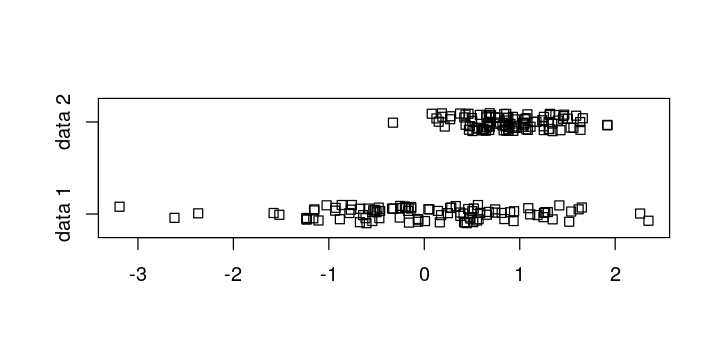

In [20]:
stripchart(list(randnums1, randnums2), method="jitter", group.names = c("data 1","data 2"))

Let's do some embellishments:

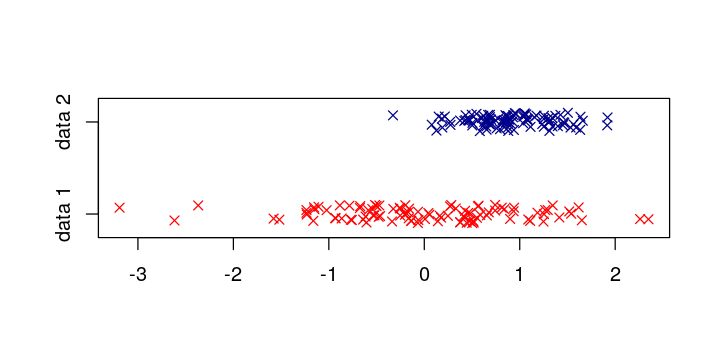

In [21]:
stripchart(list(randnums1, randnums2), method="jitter",
           group.names = c("data 1","data 2"),
          col=c("red","darkblue"), pch=4)

Exporting graphics
---

We frequently need to save our plot in various graphics formats so that we can put them in reports, papers or web pages. R can export graphics to many formats, including JPEG, PNG, TIFF, SVG, PDF, PS, BMP, WMF.

For example, here are the steps to create a PNG file
    * Call the `png()` function with the file name as argument.
    * Give the plotting commands. They will not produce a visible plot now.
    * When done, call the function `dev.off()`. Very important, otherwise you will get a bad file.

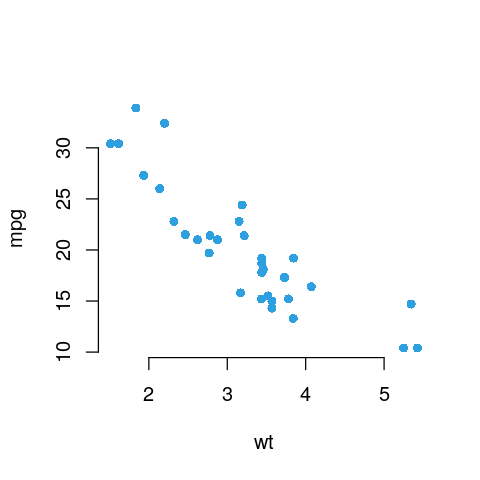

In [22]:
options(repr.plot.width=4,repr.plot.height=4)

plot(x = mtcars$wt, y = mtcars$mpg,
     pch = 16, frame = FALSE,
     xlab = "wt", ylab = "mpg", col = "#2E9FDF")

In [23]:
png("cars.png")  # open the PNG file.
# Plotting commands
plot(x = mtcars$wt, y = mtcars$mpg,
     pch = 16, frame = FALSE,
     xlab = "wt", ylab = "mpg", col = "#2E9FDF")
# finalize the export to png
dev.off()

png 
  2

Note: If you are using RStudio, this can be achieved from the _Plots->Export->Save_ menu.

To export to a PDF file, just change the first line:

In [24]:
pdf("cars.pdf")
plot(x = mtcars$wt, y = mtcars$mpg,
     pch = 16, frame = FALSE,
     xlab = "wt", ylab = "mpg", col = "#2E9FDF")
dev.off()

png 
  2

The plotting functions allow for many customizations, depending on the file format. One common customization is the size of the plot. Let's recreate the PNG file with a different size.

In [25]:
png("cars2.png", width = 200, height = 300) 
# Plotting commands
plot(x = mtcars$wt, y = mtcars$mpg,
     pch = 16, frame = FALSE,
     xlab = "wt", ylab = "mpg", col = "#2E9FDF")
# finalize the export to png
dev.off()

png 
  2

Numerical methods
====

Expressions
----
R supports _unevaluated expressions_. We can specify a formula with this, but it is not evaluated (computed) until we explicitly ask.

In [26]:
y <- expression(x^2+1)
y

expression(x^2 + 1)

In [27]:
x <- 1:10
print(eval(y))

 [1]   2   5  10  17  26  37  50  65  82 101


We can plot an expression as needed:

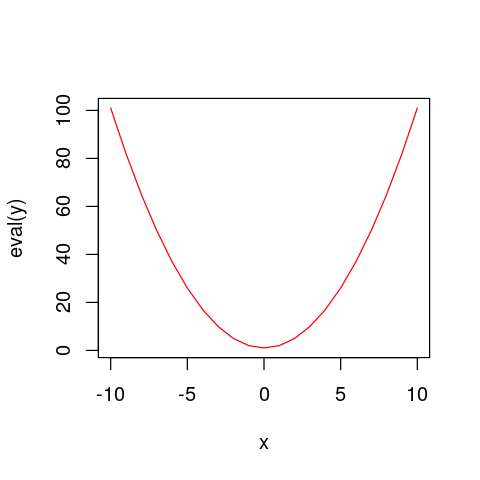

In [28]:
x <- -10:10
plot(x, eval(y), type="l", col="red")

Symbolic differentiation
----
R has some capabilities to make symbolic differentiation. For example, let's get the derivative of the expression $x^2\sin(2x)$ with respect to $x$:

In [29]:
y <- expression(x^2*sin(2*x))

In [30]:
D(y,"x")

2 * x * sin(2 * x) + x^2 * (cos(2 * x) * 2)

To get the derivative at a particular point, use the `eval()` function.

In [31]:
eval({x <- 1; D(y,"x")})

[1] 0.9863012

Plot the function and its derivative together:

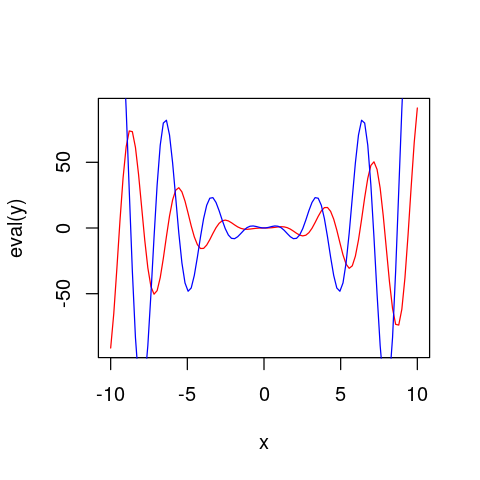

In [32]:
x <- seq(-10,10,length.out = 100)
plot(x, eval(y), type="l", col="red")
lines(x, eval(D(y,"x")), col="blue")

We can also take partial derivatives

In [33]:
z <- expression(x^2*sin(2*y))

In [34]:
D(z, "x")

2 * x * sin(2 * y)

In [35]:
D(z, "y")

x^2 * (cos(2 * y) * 2)

Numerical integration
----
R cannot to symbolic integration, but the `integrate()` function can numerically compute integrals.

For example, let's evaluate $\int_0^1 x^3\mathrm{d}x$, which we know to be $\frac{1}{4}$.

In [36]:
f <- function(x) x^3
integrate(f, 0, 1)

0.25 with absolute error < 2.8e-15

The integral limits can be infinities. For example, the area below the bell curve is 
$$\int_{-\infty}^{\infty}\mathrm{e}^{-x^2}\mathrm{d}x = \sqrt{\pi} \approx 1.7724538$$.

In [37]:
f <- function(x) exp(-x^2)
integrate(f,-Inf,Inf)

1.772454 with absolute error < 4.3e-06

Finding minima of functions
-----

Consider the following function of a single variable.
$$f(x) = \sin(x)\mathrm{e}^{-x^2}$$

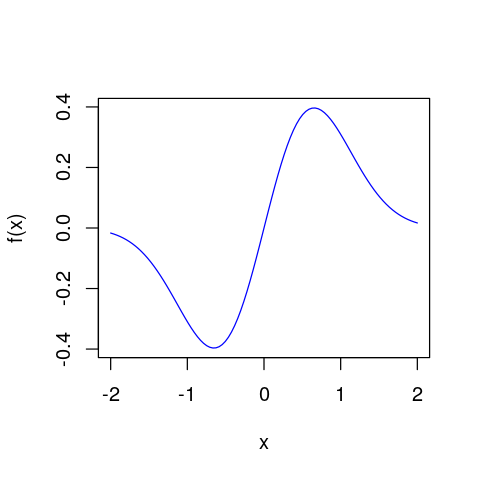

In [38]:
f <- function(x) sin(x)*exp(-x^2)

x <- seq(-2,2,length.out = 100)
plot(x, f(x), type="l", col="blue")

Let's find the minimum of this function, which we see is between -2 and 0. The `optimize()` function can be used to optimize functions of one variable:

In [39]:
optimize(f, c(-2,0))

$minimum
[1] -0.6532861

$objective
[1] -0.396653

How about determining the maximum of the curve? One possible approach is to minimize the _negative_ of the original function.

In [40]:
fn <- function(x) -sin(x)*exp(-x^2)
optimize(fn, c(0,2))

$minimum
[1] 0.6532861

$objective
[1] -0.396653

To use the original function directly to determine the maximum, set the `maximum` parameter to `TRUE`.

In [41]:
optimize(f, c(0,2), maximum = TRUE)

$maximum
[1] 0.6532861

$objective
[1] 0.396653

For optimization in two or more dimensions use the general-purpose `optim()` function.

Find the minimum of $(x-1)^2 + (y+2)^2$.

In [42]:
f <- function(x) (x[1]-1)^2 + (x[2]+2)^2
optim(c(0,0), f)$par

[1]  0.9998895 -2.0000124

Root finding
----
Suppose we want to find the intersection of the curve $y = 1/x$ with the curve $y = \sin(x)$.

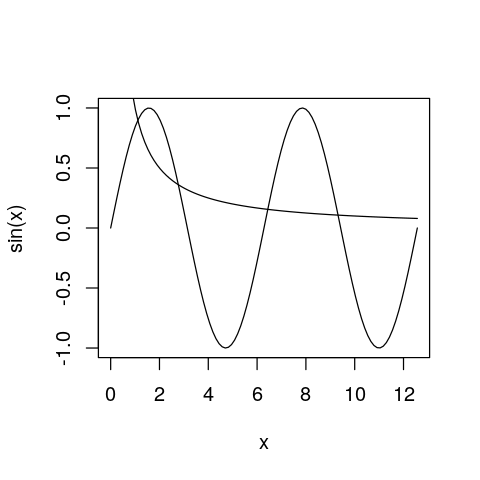

In [43]:
x <- seq(0,4*pi, length.out = 100)
plot(x, sin(x), type="l")
lines(x,1/x)

This is equivalent to solving the nonlinear equation:
$$ \frac{1}{x} = \sin(x)$$
or, 
$$ \frac{1}{x} - \sin(x) = 0$$.
The last problem is usually stated as _finding the root_ of a function, i.e., find the $x$ value such that $f(x)=0$. On of the R functions to find the root of a function is `uniroot()`.

In [44]:
uniroot(function(x) 1/x-sin(x), c(0,2))

$root
[1] 1.114152

$f.root
[1] 5.805565e-06

$iter
[1] 6

$init.it
[1] NA

$estim.prec
[1] 6.103516e-05

Matrix operations
-----

**Matrix multiplication**

Let us define two matrices:

In [45]:
M1 <- matrix(c(1,3,2,4),nrow=2)
M2 <- matrix(c(1,0,-1,1),nrow=2)
M1

1,2
3,4


In [46]:
M2

1,-1
0,1


Remember that the product operator `*` performs elementwise product.

In [47]:
M1*M2

1,-2
0,4


The familiar matrix product operator is `%*%`.

In [48]:
M1%*%M2

1,1
3,1


**Solving linear equation systems**

Suppose we want to solve the linear system:
$$\begin{eqnarray}
x_1 + x_2 &=& 2\\
-x_1 + x_2 &=& 4\\
\end{eqnarray}$$

In matrix form:
$$
\left(
 \begin{matrix}
  1 & 1 \\
  -1 & 1
 \end{matrix}
\right)
\left(
 \begin{array}{c}
  x_1\\
  x_2
 \end{array}
\right) = 
\left(
 \begin{array}{c}
  2\\
  4
 \end{array}
\right) 
$$

In [49]:
a <- matrix(c(1,-1,1,1), nrow=2)
b <- c(2,4)
solve(a,b)

[1] -1  3

**Matrix inverse**

If we omit the right-hand side vector,`solve()` can be used to get the inverse of a matrix.

In [50]:
solve(a)

0.5,-0.5
0.5,0.5


**Matrix transpose**

In [51]:
a

1,1
-1,1


In [52]:
t(a)

1,-1
1,1


**Determinant**

In [53]:
a

1,1
-1,1


In [54]:
det(a)

[1] 2

**Matrix diagonal**

In [55]:
a

1,1
-1,1


In [56]:
print(diag(a))

[1] 1 1


If we give a vector parameter to `diag()`, it creates a matrix with those elements on the diagonal.

In [57]:
diag(c(1,2,3,4,5))

1,0,0,0,0
0,2,0,0,0
0,0,3,0,0
0,0,0,4,0
0,0,0,0,5


If we give a single number argument to`diag()`, it creates a matrix of specified size with ones on the diagonal.

In [58]:
diag(3)

1,0,0
0,1,0
0,0,1


In [59]:
diag(5)

1,0,0,0,0
0,1,0,0,0
0,0,1,0,0
0,0,0,1,0
0,0,0,0,1
